In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from scipy.integrate import solve_ivp
from scipy.constants.constants import Planck

<ipython-input-2-f54ff1a9eb93>:5: DeprecationWarning: Please use `Planck` from the `scipy.constants` namespace, the `scipy.constants.constants` namespace is deprecated.
  from scipy.constants.constants import Planck


\begin{equation}
L^2\frac{d^2\psi(x)}{dx^2} + \frac{2mL^2}{\hbar^2}\psi(x)(V(x)-E) = 0.  
\end{equation}

Al hacer un cambio de variable con $u = x/L$

\begin{equation}
\frac{d^2\psi(uL)}{du^2} + \frac{2mL^2}{\hbar^2}\psi(uL)(V(uL)-E) = 0. 
\end{equation}

Si llamamos a $\frac{d\psi(uL)}{du} = Ω  $ el vector será
$$\begin{pmatrix}
  \frac{d\psi(uL)}{du}\\
  \frac{dΩ}{du}  \\
 \end{pmatrix} =
 \begin{pmatrix}
  Ω  \\
  \frac{2mL^2}{\hbar^2}\psi(uL)(V(uL)-E) \\
 \end{pmatrix}
 $$
Como se trata de un pozo de potencial de la forma

Tenemos que el vector de estado nos queda como
$$\begin{pmatrix}
  \frac{d\psi(uL)}{du}\\
  \frac{dΩ}{du}  \\
 \end{pmatrix} =
 \begin{pmatrix}
  Ω  \\
  -\psi(uL)\frac{2mL^2}{\hbar^2}E \\
 \end{pmatrix}
 $$



In [ ]:
def deriv(x, y, k):
     return np.array((y[1], -k * y[0]))

El método de shooting que consiste en resolver el problema de valor inicial:

$$y\prime\prime = f(x,y,y\prime) \qquad a\leq x \leq b$$
$$y(a)=\alpha \qquad y\prime(a)=M$$


Para eso se define la función:
$$F(M_k) = y(M_k;b) -\beta $$

Para este caso que tenemos una función de el stilo

$$\psi\prime\prime(uL) + k\psi(uL) = 0 \qquad 0\leq u \leq 1$$
$$y(0)=0 \qquad y(L)= \epsilon $$

Que la reescribimos como la siguient ecuación
$$\psi\prime\prime(uL) + k\psi(uL) = 0 \qquad 0\leq u \leq 1$$
$$y(0)=0 \qquad y\prime(1)= k $$
Con $k = \frac{2mEL}{\hbar^2}$
Por lo que definiremos la funicón H como 
$$H(k) = y(k;1) - \epsilon $$ 
Con $\epsilon = 1e\cdot10^{-4}$ 

In [ ]:

def h(k,yp0, y0, yf, t0, tf, dt):
     T=np.arange(t0, tf+dt, dt)
     return solve_ivp(deriv, [T.min(), T.max()], [y0, yp0], t_eval=T,
                      args=(k,)).y[0][-1] - yf

def solvebvpE(yp0, y0, yf, t0, tf, dt, pre, k):
     return root(h, k, args=(yp0, y0, yf, t0, tf, dt), tol = pre).x[0]
 

In [ ]:
def solveIVPENormalized(yp0, y0, yf, t0, tf, dt,pre, n):

    range_E = np.arange(0.9, 10.1, 0.1)*np.power(np.pi,2)

    Vt = np.power(np.pi*np.arange(1,4),2) #Valores Teoricos
    En=[]
    SolNor=[]

    for i in range_E:
        E = solvebvpE(yp0, y0, yf, t0, tf, dt, pre,i)
        #print(E)
        for j in Vt:
             if round(E,4)  not in En and np.isclose(j, E, atol=1e-1) :
                #print(E)
                En.append(round(E,4))
    En = sorted(En)

    for i in En:
        T=np.arange(t0, tf+dt, dt)
        sol = solve_ivp(deriv, [T.min(), T.max()], [y0, yp0], t_eval=T,
                      args=(i,)).y[0]

        A=np.dot(sol,sol)*dt
        #print(A)
        SolNor.append(sol/A)

    return En[n-1],SolNor[n-1]

In [ ]:
pre=1e-4
yp0=1.0
y0,yf=0.0,0.0
t0,tf=0.0,1.0
dt=0.01


<ipython-input-3-0e0eee27c1b9>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array((y[1], -k * y[0]))


19.72578136658818


Text(0.5, 1.0, 'Solucion de ecuacion de scrodinger para E=9.8656')

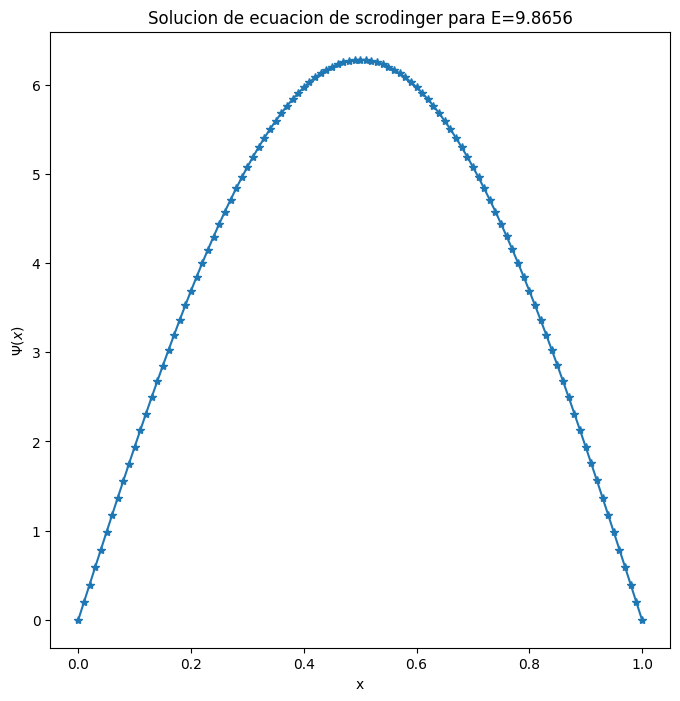

In [ ]:
E, sol = solveIVPENormalized(yp0, y0, yf, t0, tf, dt, pre, 1)
A = np.dot(sol,sol)*dt
print(A)

#Grafica
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(np.arange(t0, tf+dt, dt), sol , "-*")
ax.set_xlabel(r"x")
ax.set_ylabel(r"$\Psi (x)$")
ax.set_title(f"Solucion de ecuacion de scrodinger para E={E}")

<ipython-input-3-0e0eee27c1b9>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array((y[1], -k * y[0]))


78.89600593804697


Text(0.5, 1.0, 'Solucion de ecuacion de scrodinger para E=39.4591')

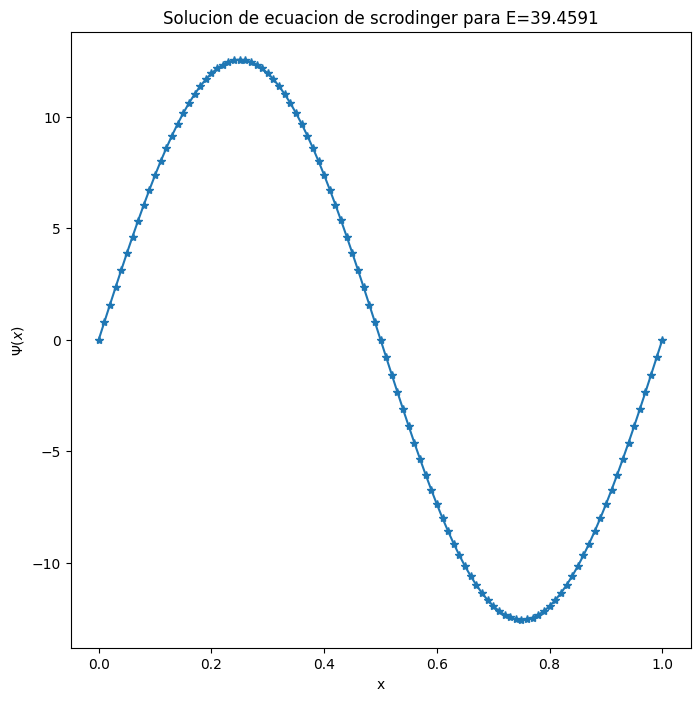

In [ ]:
E, sol = solveIVPENormalized(yp0, y0, yf, t0, tf, dt, pre, 2)
A = np.dot(sol,sol)*dt
print(A)

#Grafica
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(np.arange(t0, tf+dt, dt), sol , "-*")
ax.set_xlabel(r"x")
ax.set_ylabel(r"$\Psi (x)$")
ax.set_title(f"Solucion de ecuacion de scrodinger para E={E}")

<ipython-input-3-0e0eee27c1b9>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array((y[1], -k * y[0]))


177.50567845167794


Text(0.5, 1.0, 'Solucion de ecuacion de scrodinger para E=88.7773')

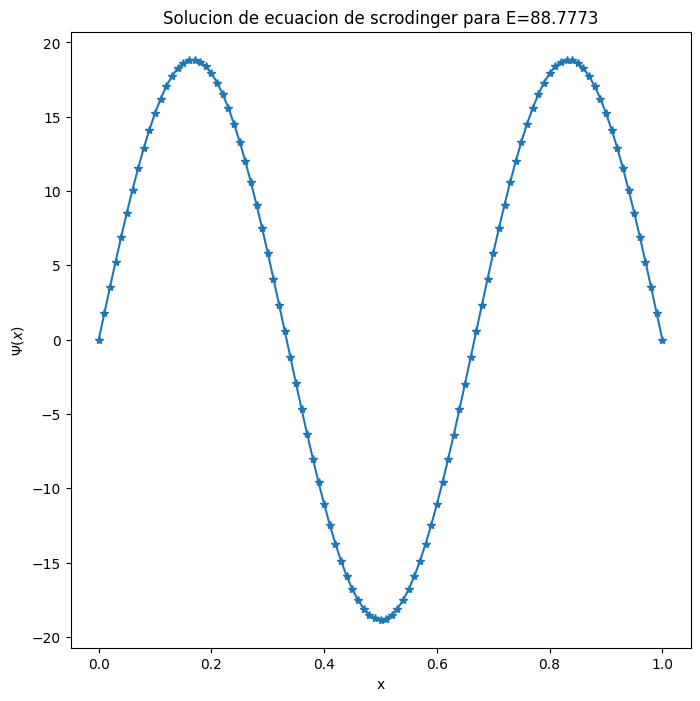

In [ ]:
E, sol = solveIVPENormalized(yp0, y0, yf, t0, tf, dt, pre, 3)
A = np.dot(sol,sol)*dt
print(A)

#Grafica
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(np.arange(t0, tf+dt, dt), sol , "-*")
ax.set_xlabel(r"x")
ax.set_ylabel(r"$\Psi (x)$")
ax.set_title(f"Solucion de ecuacion de scrodinger para E={E}")

#100 Primeros Estados de energía 

10.0
<class 'numpy.float128'>
Integral de Normalización: 1.0000000000000002


Text(0.5, 1.0, 'E')

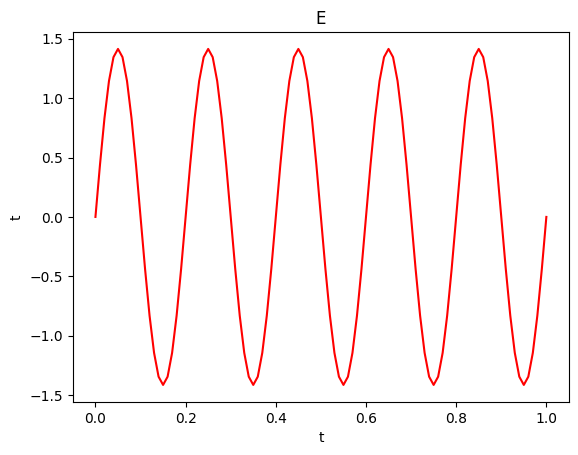

In [ ]:
t0=0
tf=1
dt=0.01
L=1
T = np.arange(t0, tf+dt, dt)
Y = lambda n : np.sqrt(2/L)*np.sin((n*np.pi/L)*T)

n= np.float128(np.power(10,1))
print(n)
print(type(n))
print(f"Integral de Normalización: {dt*np.dot(Y(n),Y(n))}")
plt.plot(T, Y(n),"r")
plt.xlabel("t")
plt.ylabel("t")
plt.title("E")

In [ ]:
def graphs(N):

    fig, axs = plt.subplots(N, 10, figsize=(24,24), constrained_layout=True,
                        sharex=False, sharey=False)

    for nn, ax in enumerate(axs.flat):
        ax.plot(T, Y(nn + 1),"r")
        ax.set_xlabel("x")
        ax.set_ylabel(f"\psi")
        ax.set_title(f"E={nn+1}")

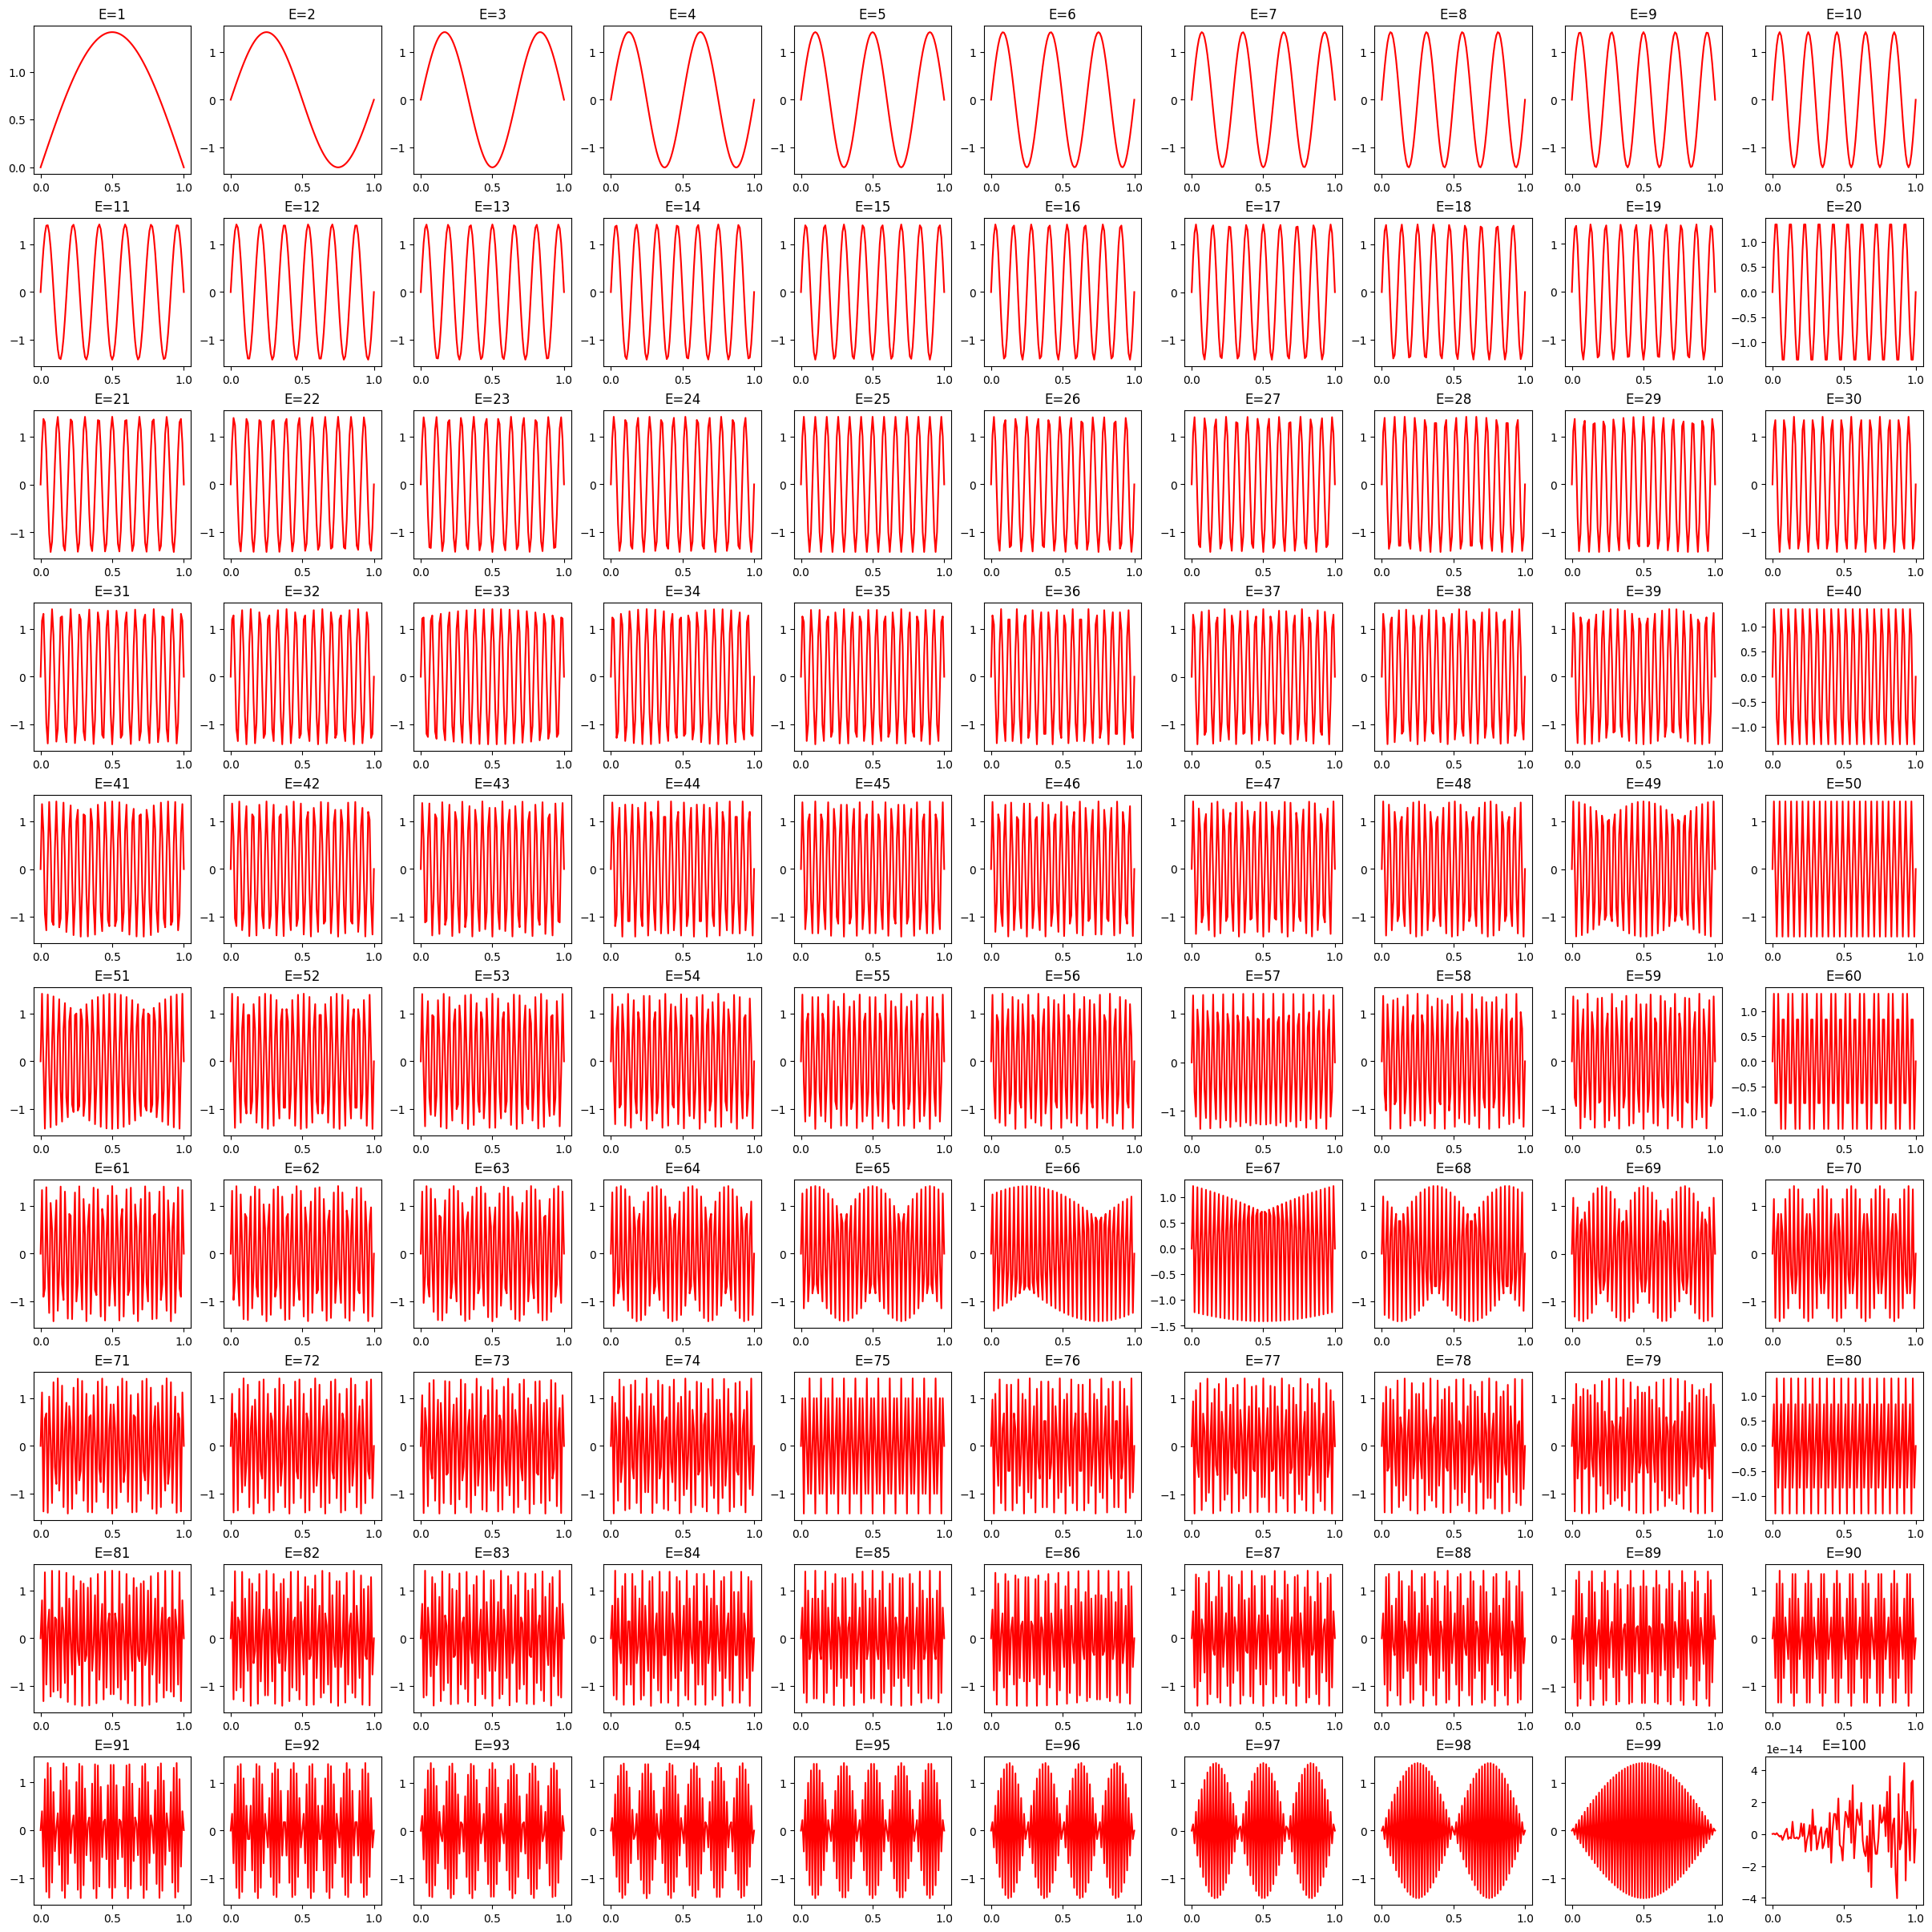

In [ ]:
N=10
graphs(N)

#Ecuación de Schrodinger para cualquier potencial

Se definira una función que reciba un potencial arbitrario, devuelva la expresión algebraica y la solución